In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide 
from nixtla.utils import in_colab

In [ ]:
#| hide 
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# Fine-tuning

Fine-tuning is a powerful process for utilizing TimeGPT more effectively. Foundation models such as TimeGPT are pre-trained on vast amounts of data, capturing wide-ranging features and patterns. These models can then be specialized for specific contexts or domains. With fine-tuning, the model's parameters are refined to forecast a new task, allowing it to tailor its vast pre-existing knowledge towards the requirements of the new data. Fine-tuning thus serves as a crucial bridge, linking TimeGPT's broad capabilities to your tasks specificities.

Concretely, the process of fine-tuning consists of performing a certain number of training iterations on your input data minimizing the forecasting error. The forecasts will then be produced with the updated model. To control the number of iterations, use the `finetune_steps` argument of the `forecast` method.

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()    
    colab_badge('docs/tutorials/06_finetuning')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/tutorials/06_finetuning.ipynb)

## 1. Import packages
First, we import the required packages and initialize the Nixtla client

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

> 👍 Use an Azure AI endpoint
> 
> To use an Azure AI endpoint, remember to set also the `base_url` argument:
> 
> `nixtla_client = NixtlaClient(
>         base_url="you azure ai endpoint",
>         api_key="your api_key"`
>)

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

## 2. Load data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## 3. Fine-tuning

In [ ]:
timegpt_fcst_finetune_df = nixtla_client.forecast(
    df=df, h=12, finetune_steps=10,
    time_col='timestamp', target_col='value',
)

INFO:nixtlats.nixtla_client:Validating inputs...
INFO:nixtlats.nixtla_client:Preprocessing dataframes...
INFO:nixtlats.nixtla_client:Inferred freq: MS
INFO:nixtlats.nixtla_client:Calling Forecast Endpoint...


> 📘 Available models in Azure AI
>
> If you are using an Azure AI endpoint, please be sure to set `model="azureai"`:
>
> `nixtla_client.forecast(..., model="azureai")`
> 
> For the public API, we support two models: `timegpt-1` and `timegpt-1-long-horizon`. 
> 
> By default, `timegpt-1` is used. Please see [this tutorial](https://docs.nixtla.io/docs/tutorials-long_horizon_forecasting) on how and when to use `timegpt-1-long-horizon`.

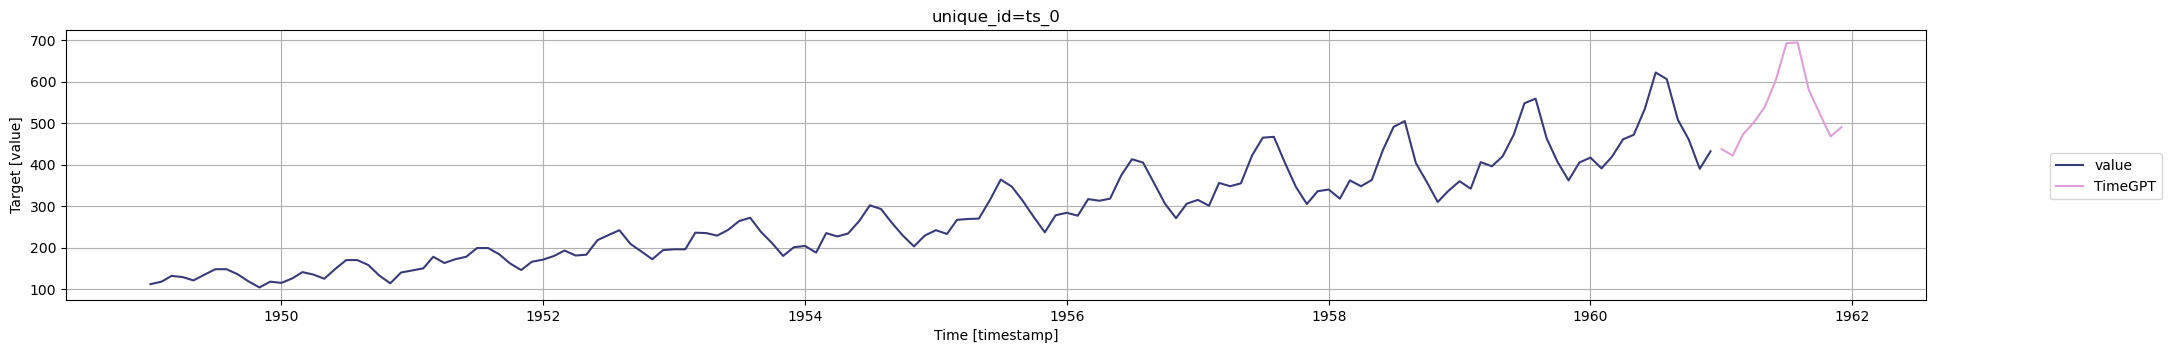

In [ ]:
nixtla_client.plot(
    df, timegpt_fcst_finetune_df, 
    time_col='timestamp', target_col='value',
)

In this code, `finetune_steps=10` means the model will go through 10 iterations of training on your time series data.

Keep in mind that fine-tuning can be a bit of trial and error. You might need to adjust the number of `finetune_steps` based on your specific needs and the complexity of your data. It's recommended to monitor the model's performance during fine-tuning and adjust as needed. Be aware that more `finetune_steps` may lead to longer training times and could potentially lead to overfitting if not managed properly. 

Remember, fine-tuning is a powerful feature, but it should be used thoughtfully and carefully.

For a detailed guide on using a specific loss function for fine-tuning, check out the [Fine-tuning with a specific loss function](https://docs.nixtla.io/docs/tutorials-fine_tuning_with_a_specific_loss_function) tutorial.